# T Test

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## First Normality [Normal Distribution] Test

We check the normal distribution using the numerical data.

<Axes: xlabel='age', ylabel='Count'>

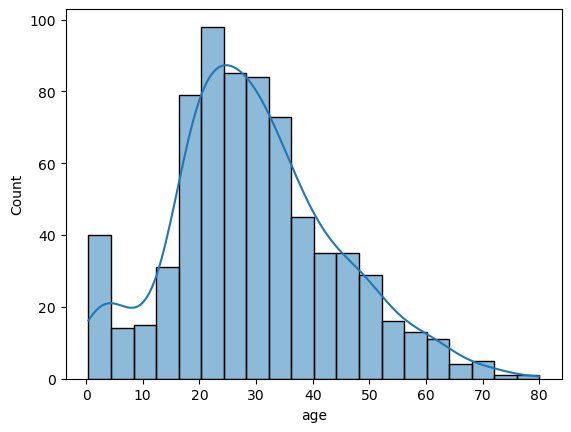

In [23]:
# Graphical method
sns.histplot(data=df,x='age',kde=True)

Now using the Shapiro Wilk test for Normal Distribution / Gaussian Dostribution.

`Null Hypothesis: ` the data is normally distributed.\
`Alternative Hypothesis: ` the data is not normally distributed.

In [24]:
df['age'].isnull().sum()
# remove the nan values
df = df.dropna(subset=['age'])

In [25]:
# Shapiro Wilk Test
statistic, p = stats.shapiro(df['age'])
print(p)

if(p > 0.05):
    print('Normality Assumed')
else:
    print('Normality Not Assumed')

7.337348958673594e-08
Normality Not Assumed


<Axes: xlabel='fare', ylabel='Count'>

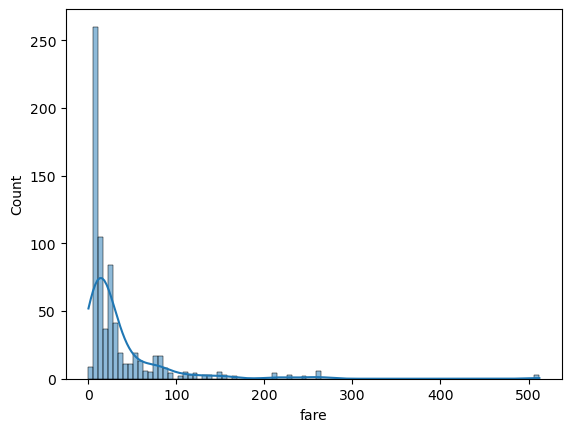

In [26]:
sns.histplot(data=df, x='fare', kde=True)

In [27]:
statistic, p = stats.shapiro(df['fare'])
print(p)

if(p > 0.05):
    print('Normality Assumed')
else:
    print('Normality Not Assumed')

7.461943489525117e-40
Normality Not Assumed


In [29]:
# Perform the Kolmogorov-Smirnov test against a standard normal distribution
D, p = stats.ks_1samp(df['age'], 'norm')

print("Kolmogorov-Smirnov statistic (D):", D)
print("p-value:", p)
if p < 0.05:
    print("Reject H0: The datasets come from different distributions.")
else:
    print("Fail to reject H0: The datasets come from the same distribution.")

TypeError: 'str' object is not callable